<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Javier Brito</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

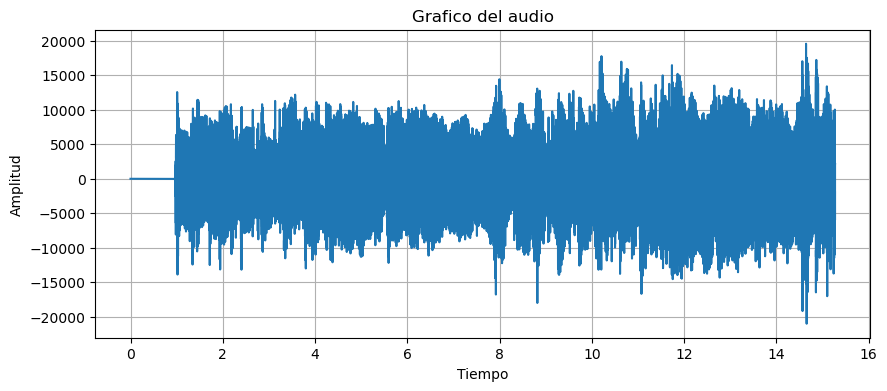

In [2]:
sample_rate, audio_data = wavfile.read("Baracuda_1977.wav")
tiempo = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))
audio_data_drop = audio_data[:, 1]

plt.figure(figsize=(10, 4))
plt.plot(tiempo,audio_data_drop)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Grafico del audio")
plt.grid(True)
plt.show()

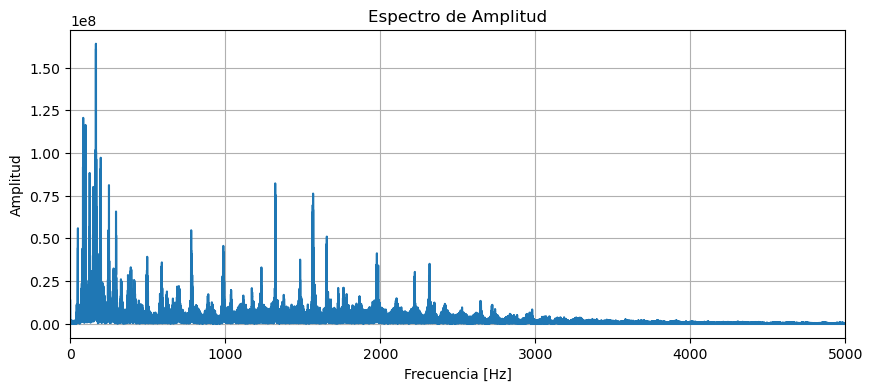

In [3]:
frequencies = np.fft.fftfreq(len(audio_data_drop), 1/sample_rate)
audio_fft = np.fft.fft(audio_data_drop)

plt.figure(figsize=(10, 4))
plt.plot(frequencies[:len(audio_data_drop)//2], np.abs(audio_fft[:len(audio_data_drop)//2]))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.title('Espectro de Amplitud')
plt.xlim(0,5000)
plt.grid(True)
plt.show()

## 2. Obtén el espectrograma de tu señal de audio

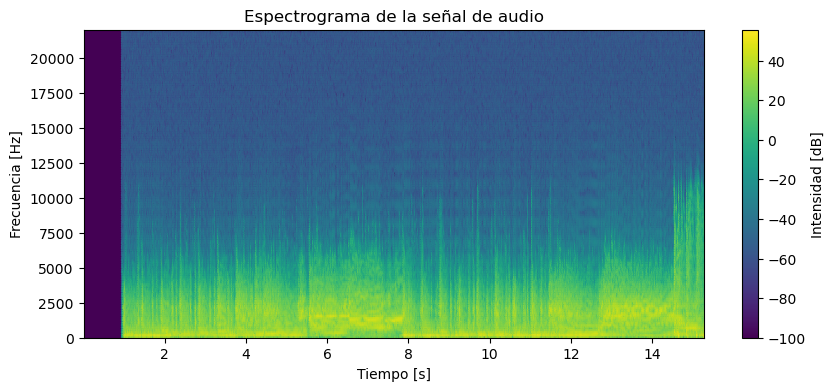

In [4]:
from scipy.signal import spectrogram

frequencies, times, Sxx = spectrogram(audio_data_drop, fs=sample_rate)
plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx+1e-10), shading='gouraud')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la señal de audio')
plt.colorbar(label='Intensidad [dB]')
plt.show()

## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

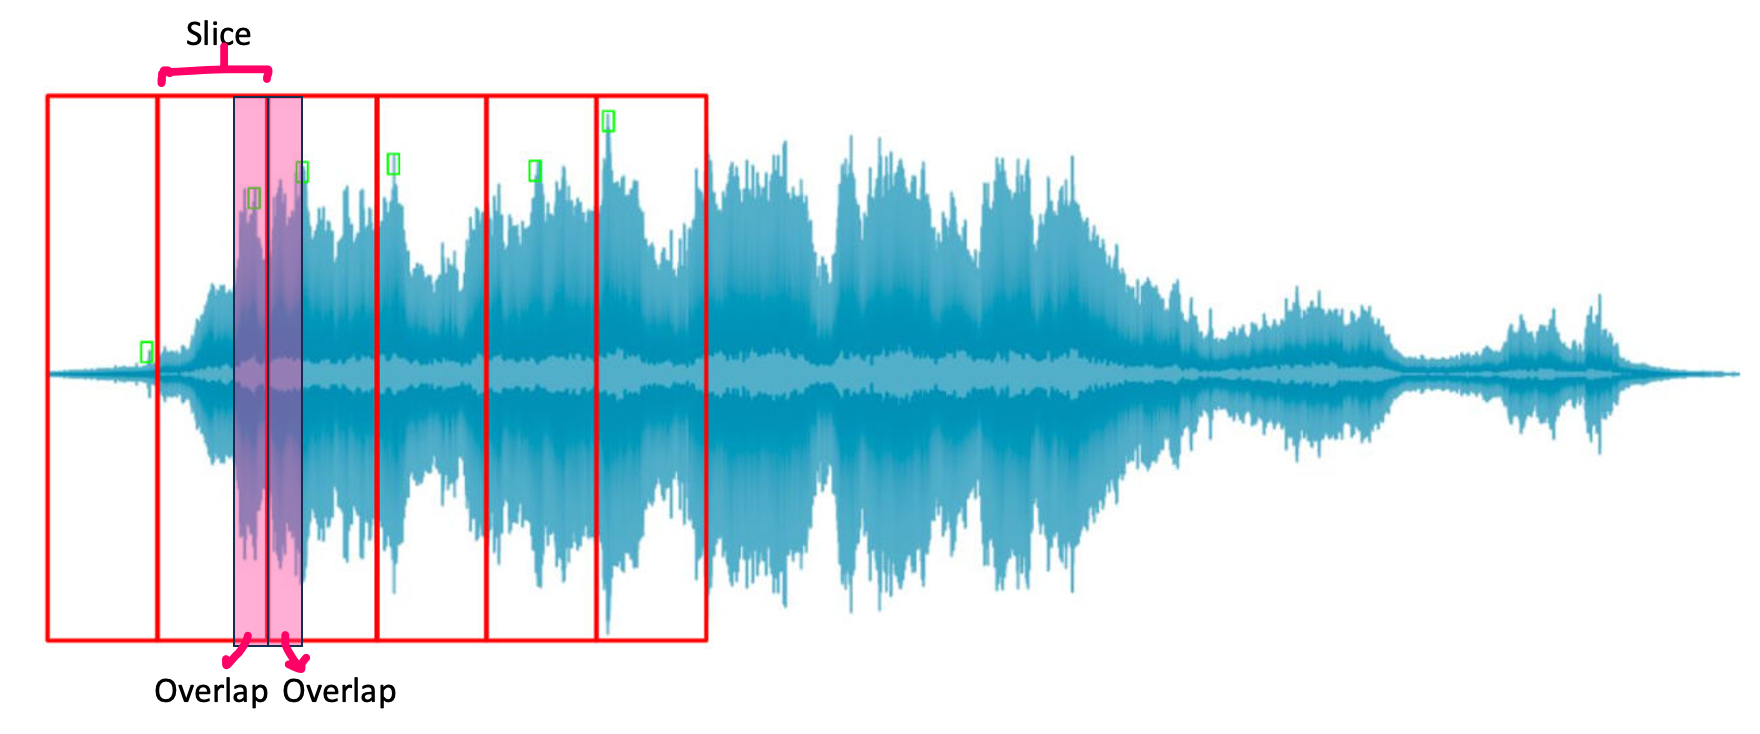

In [5]:
import numpy as np

def fragmentar_audio(audio_data, longitud_segmento, overlap):
    ## Se calcula el numero de segmentos el cual definira 
    ## La cantidad de veces que se ejecutaran los ciclos for.
    seg_sum = len(audio_data) // longitud_segmento
    segmentos = []
    
    for i in range(seg_sum):
        inicio = i * longitud_segmento
        fin = inicio + longitud_segmento
        
        segmento = audio_data[inicio:fin]
        segmentos.append(segmento)
                                                ## Si quedan muestras restantes, se calcula un resto para 
    if len(audio_data) % longitud_segmento != 0:## verificar si hay que agregar un ultimo segmento.
        segmento_final = audio_data[-longitud_segmento:]
        segmentos.append(segmento_final)
    return segmentos

audio_data = audio_data_drop  
longitud_segmento = 200000  ## Numero de muestras
overlap = 200  # Número de muestras en cada extremo del segmento.

segmentos = fragmentar_audio(audio_data, longitud_segmento, overlap)
num_segmentos = len(segmentos)
print("Número de segmentos:", num_segmentos)

Número de segmentos: 4


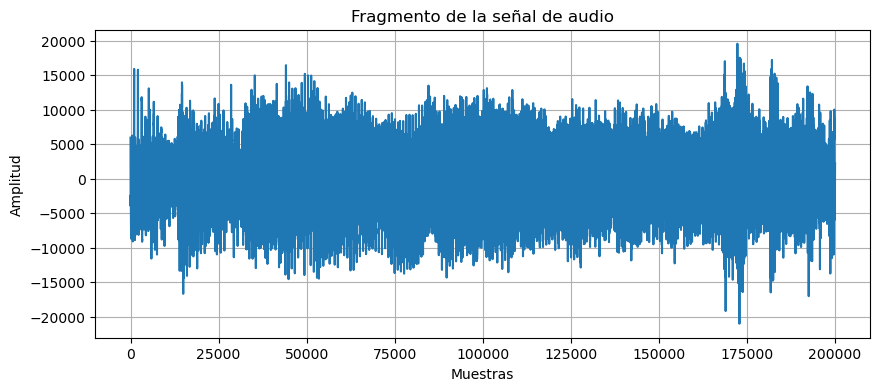

In [6]:
def mostrar_fragmento(segmento): ## Funcion creada para graficar
    plt.figure(figsize=(10, 4))  ## Algun segmento generado con anterioridad.
    plt.plot(segmento)
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.title("Fragmento de la señal de audio")
    plt.grid(True)
    plt.show()
## Se llama a la funcion.    
mostrar_fragmento(segmentos[3])

## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


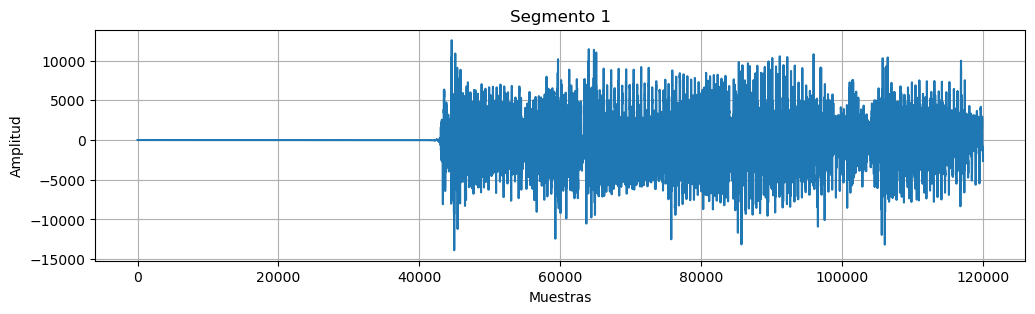

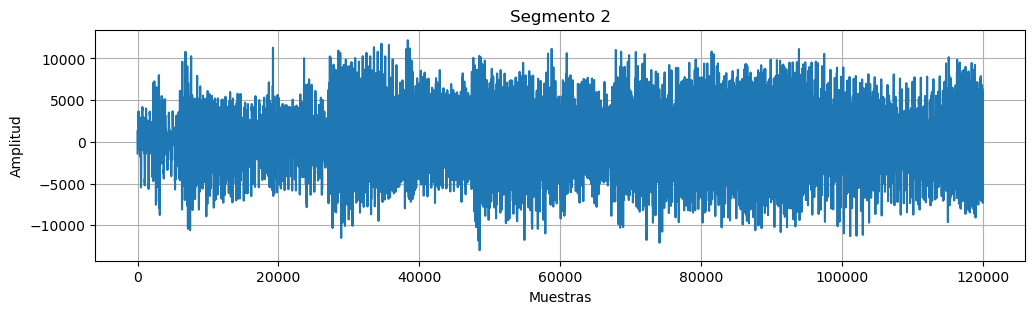

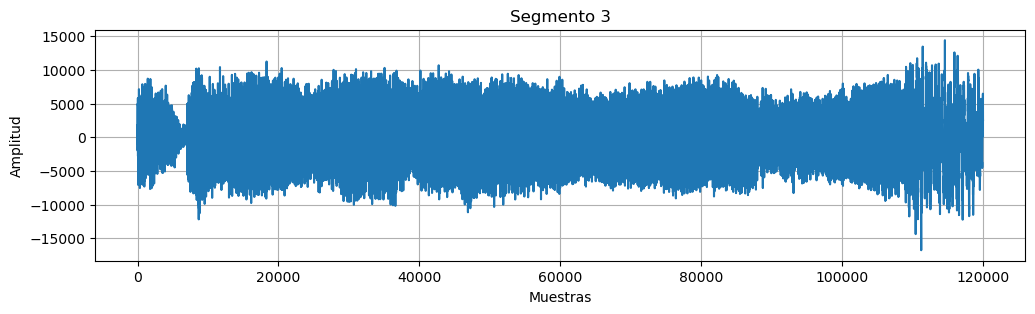

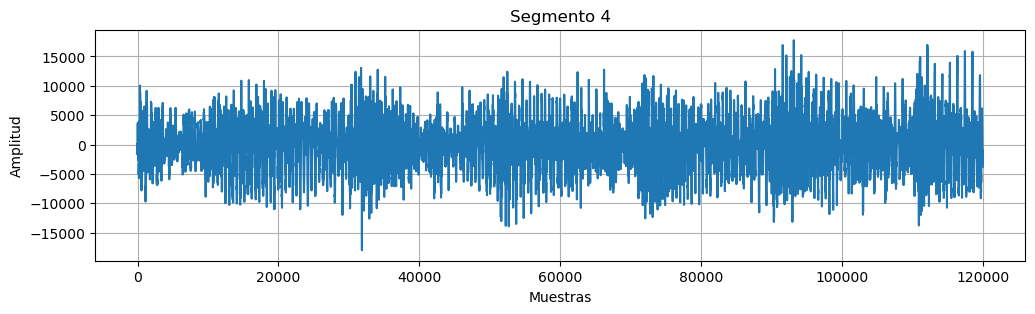

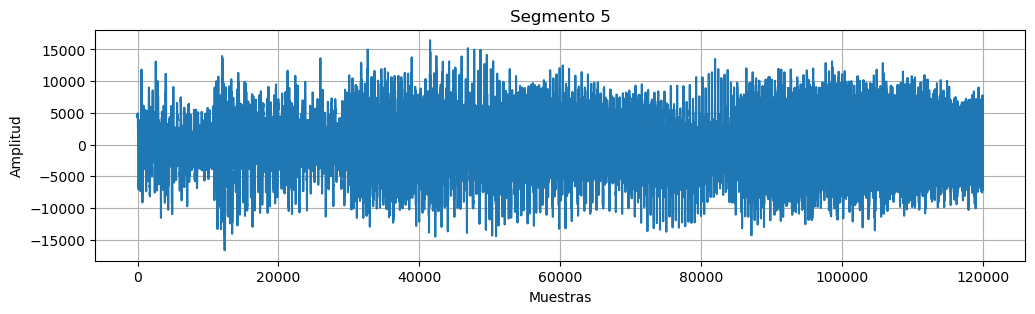

Reproduccion del audio n°1:


In [7]:
import torch
import matplotlib.pyplot as plt

audio_tensor = torch.tensor(audio_data_drop, dtype=torch.float32)## Se convierte un audio en un tensor
                                                                 ## Utilizando como formato de datos
                                                                 ## Float 32.
long_seg = 120000  ##Numero de muestras por segmento
overlap = 1000  ## Numero de muestras  overlap 
segmentos = []

## Generando los tensores de pytorch
for i in range(0, len(audio_tensor)-long_seg+1, long_seg-overlap):
    segmento = audio_tensor[i:i+long_seg]
    segmentos.append(segmento)

## Graficar los segmenetos generados
for i, segmento in enumerate(segmentos):
    plt.figure(figsize=(12, 3))
    plt.plot(segmento.numpy())
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.title(f"Segmento {i+1}")
    plt.grid(True)
    plt.show()

## Se reproducen el primer segmento
print("Reproduccion del audio n°1:")
from IPython.display import Audio
Audio(torch.cat(segmentos[:1]).numpy(), rate=sample_rate)

## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

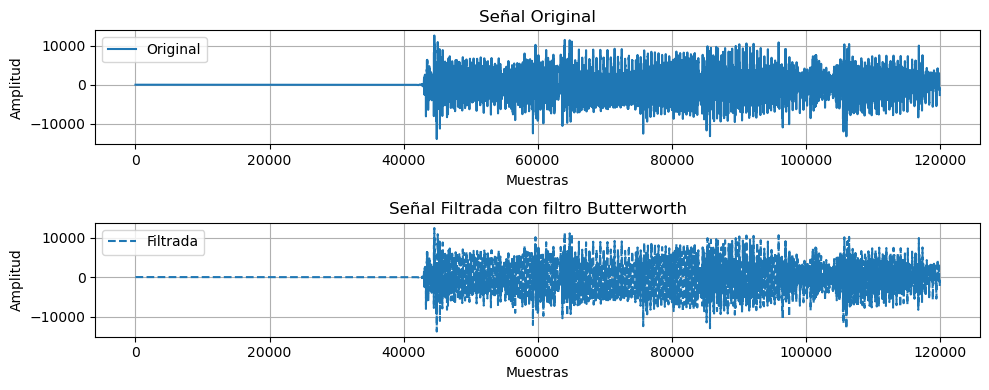

In [11]:
from scipy.signal import butter, sosfiltfilt, sosfreqz

def filtro_butterworth(audio_tensor, sample_rate, freq_cut, orden_del_filtro):
    audio_numpy = audio_tensor.numpy()
    freq_cut_norm = freq_cut / (0.5 * sample_rate)
    sos = butter(orden_del_filtro, freq_cut_norm, btype='low', output='sos')## Se obtienen los coeficientes para el filtro
    audio_numpy = sosfiltfilt(sos, audio_numpy) ## Se hace el filtro 
    audio_numpy_copy = np.copy(audio_numpy)## Se copia la señal para evitar falsos positivos
    audio_filtrado = torch.tensor(audio_numpy_copy, dtype=torch.float32) ## Se convierte en tensor
    return audio_filtrado

frecuencia_de_corte = 4000  ## Freq [Hz]
orden_del_filtro = 4  ## Orden del filtro 
audio_filtrado_tensor = filtro_butterworth(segmentos[0], sample_rate, frecuencia_de_corte, orden_del_filtro)

plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(segmentos[0].numpy(), label='Original')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal Original')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(audio_filtrado_tensor.numpy(), label='Filtrada', linestyle='--')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada con filtro Butterworth')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
